In [89]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [90]:
import pandas as pd

df = pd.DataFrame.from_csv('diamondsbig.csv')

In [91]:
df.columns

Index([u'carat', u'cut', u'color', u'clarity', u'table', u'depth', u'cert',
       u'measurements', u'price', u'x', u'y', u'z'],
      dtype='object')

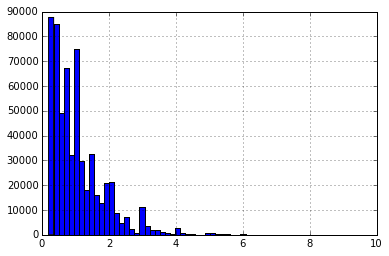

In [92]:
df['carat'].hist(bins=60)

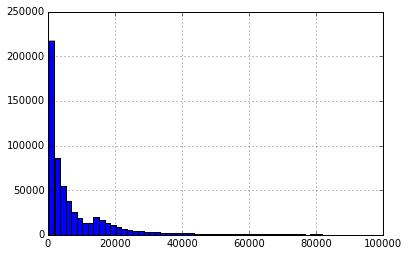

In [93]:
df['price'].hist(bins=60)

In [94]:
cut_categories = df['cut'].unique()
cut_categories

array(['V.Good', 'Good', 'Ideal'], dtype=object)

<Container object of 3 artists>

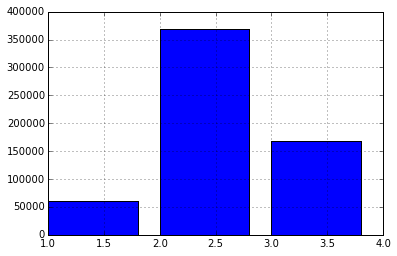

In [117]:
df.groupby('cut').size()
plt.grid(True)
plt.bar(np.arange(1, len(cut_categories)+1), df.groupby('cut').size())

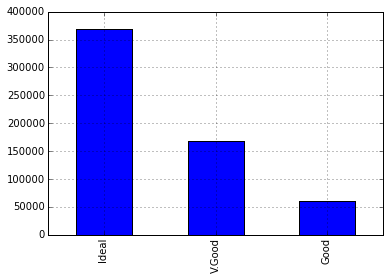

In [115]:
cut_counts = df['cut'].value_counts()
cut_counts.plot(kind='bar')

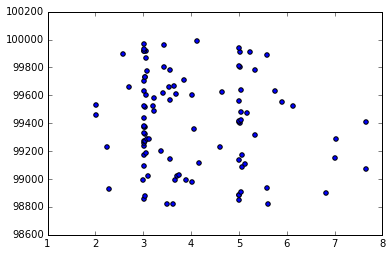

In [97]:
plt.scatter(df['carat'][-100:], df['price'][-100:])

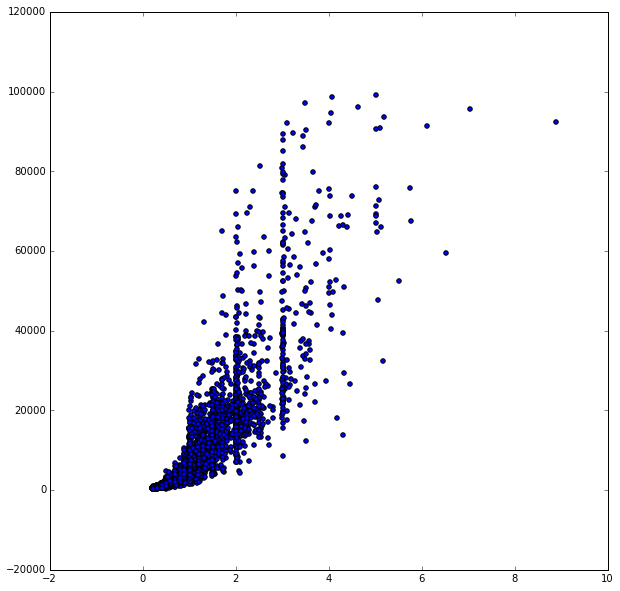

In [98]:
s_5k = df.sample(5000)
plt.figure(figsize=(10,10))
plt.scatter(s_5k['carat'], s_5k['price'])

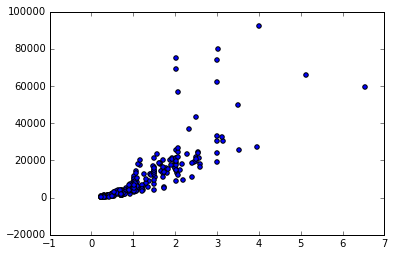

In [105]:
from sklearn.linear_model import LogisticRegression

s_learn = s_5k.fillna(0)
plt.scatter(s_learn[-300:]['carat'], s_learn[-300:]['price'])

In [127]:
y = s_learn[:-300]['price'].copy()
y[y > y.mean()] = 1
y[y <= y.mean()] = 0
y.value_counts()

0       3041
770       18
850       15
730       15
810       14
580       14
890       14
790       13
760       13
750       13
740       13
710       13
900       12
920       11
570       11
720       11
660       11
680       11
1210      11
780       11
950       11
830       11
1020      11
1130      11
820       10
1280      10
880       10
650       10
860       10
910       10
        ... 
1578       1
552        1
531        1
1535       1
1536       1
1537       1
393        1
518        1
520        1
521        1
522        1
766        1
524        1
1552       1
529        1
532        1
1575       1
533        1
1558       1
1005       1
1804       1
908        1
543        1
1569       1
1570       1
449        1
548        1
906        1
1574       1
1215       1
dtype: int64

In [118]:
y = s_learn[:-300][s_learn['price'] > s_learn['price'].mean()]
X = s_learn[:-300]['carat']


clf = LogisticRegression()
clf.fit(X, y)



/home/achtmhz/venv_datahacks/local/lib/python2.7/site-packages/pandas/core/frame.py:1819: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


ValueError: bad input shape (1343, 12)